In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
training_dataset_with_all_columns = pd.read_csv("Dataset.csv")

In [3]:
training_dataset = training_dataset_with_all_columns[['protocol_type','service','flag','src_bytes','dst_bytes','class']]

In [4]:
training_dataset.head()

,protocol_type,service,flag,src_bytes,dst_bytes,class
0,tcp,ftp_data,SF,491,0,normal
1,udp,other,SF,146,0,normal
2,tcp,private,S0,0,0,anomaly
3,tcp,http,SF,232,8153,normal
4,tcp,http,SF,199,420,normal


In [5]:
training_dataset = training_dataset.drop_duplicates()

In [6]:
training_dataset.head()

,protocol_type,service,flag,src_bytes,dst_bytes,class
0,tcp,ftp_data,SF,491,0,normal
1,udp,other,SF,146,0,normal
2,tcp,private,S0,0,0,anomaly
3,tcp,http,SF,232,8153,normal
4,tcp,http,SF,199,420,normal


In [7]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9478 entries, 0 to 25186
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   protocol_type  9478 non-null   object
 1   service        9478 non-null   object
 2   flag           9478 non-null   object
 3   src_bytes      9478 non-null   int64 
 4   dst_bytes      9478 non-null   int64 
 5   class          9478 non-null   object
dtypes: int64(2), object(4)
memory usage: 518.3+ KB


In [8]:
training_dataset.describe()

,src_bytes,dst_bytes
count,9.478000e+03,9.478000e+03
mean,4.644890e+04,8.955578e+03
std,3.923971e+06,1.446242e+05
min,0.000000e+00,0.000000e+00
25%,2.130000e+02,3.330000e+02
50%,2.680000e+02,1.041000e+03
75%,3.350000e+02,3.222000e+03
max,3.817091e+08,5.151385e+06


In [9]:
def pie_plot(df, cols_list):
    fig, axes = plt.subplots(1, 2)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

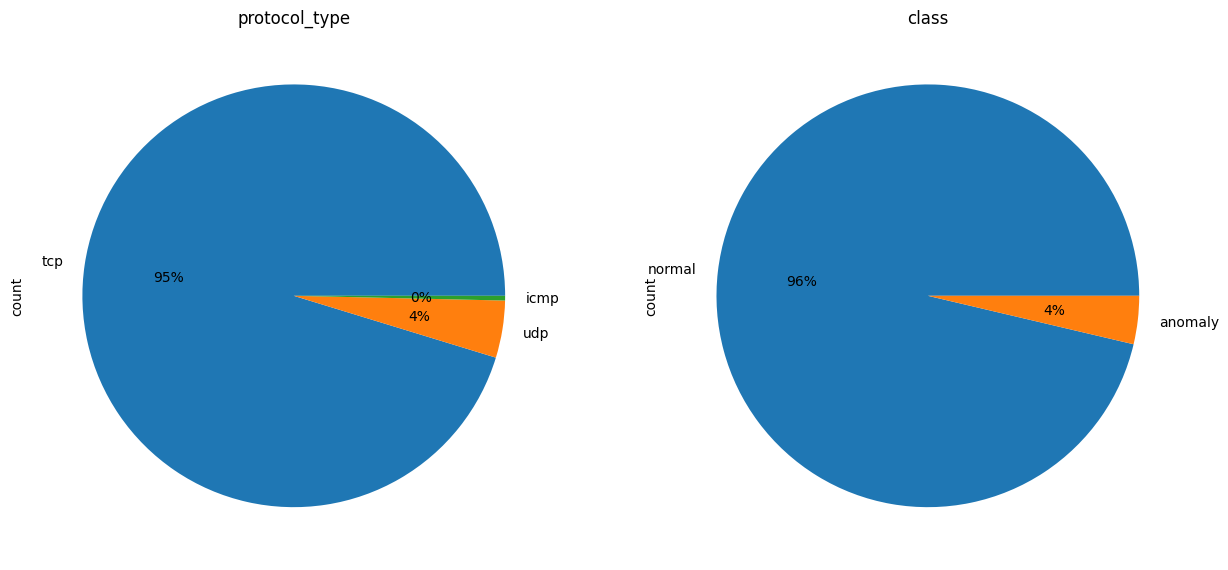

In [10]:
pie_plot(training_dataset, ['protocol_type','class'])

In [12]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [13]:
def preprocess(dataframe):
    df_num = dataframe.drop(['protocol_type','service','flag', 'class'], axis=1)

    dataframe.loc[dataframe['class'] == "normal", "class"] = 0
    dataframe.loc[dataframe['class'] != 0, "class"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type','service','flag'])
    return dataframe

In [14]:
scaled_train = preprocess(training_dataset)

In [15]:
x = scaled_train.drop('class', axis = 1).values
y = scaled_train['class'].values

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [17]:
training_dataset

,protocol_type,service,flag,src_bytes,dst_bytes,class
0,tcp,ftp_data,SF,491,0,0
1,udp,other,SF,146,0,0
2,tcp,private,S0,0,0,1
3,tcp,http,SF,232,8153,0
4,tcp,http,SF,199,420,0
...,...,...,...,...,...,...
25173,udp,domain_u,SF,39,99,0
25175,tcp,telnet,SF,139,2257,0
25184,tcp,ftp,SF,329,1063,0
25185,tcp,smtp,SF,2896,333,0


Training Accuracy Logistic Regression 93.86705354787654  Test Accuracy Logistic Regression 94.5675105485232
Training Precesion Logistic Regression 12.992125984251967  Test Precesion Logistic Regression 26.153846153846157
Training Recall Logistic Regression 11.913357400722022  Test Recall Logistic Regression 23.61111111111111


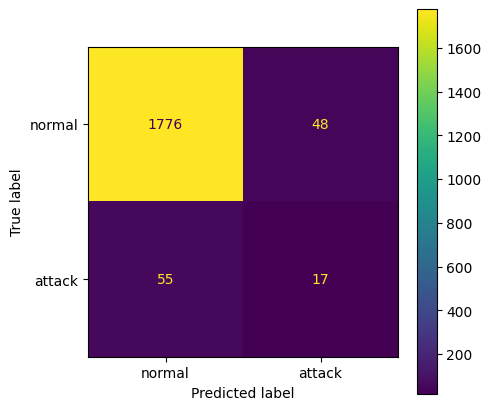

In [18]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Training Accuracy KNeighborsClassifier 98.76022157742021  Test Accuracy KNeighborsClassifier 98.4704641350211
Training Precesion KNeighborsClassifier 86.16600790513834  Test Precesion KNeighborsClassifier 83.07692307692308
Training Recall KNeighborsClassifier 78.70036101083032  Test Recall KNeighborsClassifier 75.0


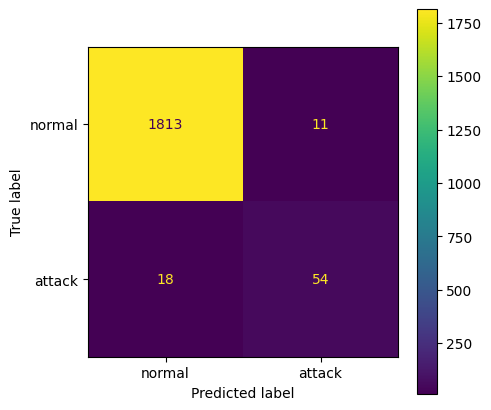

In [19]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Training Accuracy GaussianNB 96.2410973357953  Test Accuracy GaussianNB 96.09704641350211
Training Precesion GaussianNB 33.33333333333333  Test Precesion GaussianNB 37.5
Training Recall GaussianNB 2.888086642599278  Test Recall GaussianNB 4.166666666666666


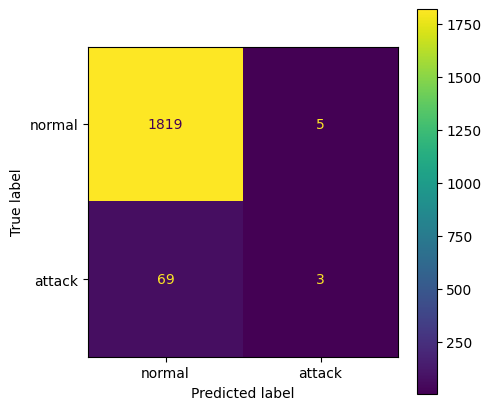

In [20]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

c:\Users\sreya\miniconda3\envs\tensorgpu\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\sreya\miniconda3\envs\tensorgpu\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC 75.11210762331838  Test Accuracy Linear SVC 76.37130801687763
Training Precesion Linear SVC 9.507042253521126  Test Precesion Linear SVC 9.130434782608695
Training Recall Linear SVC 68.23104693140795  Test Recall Linear SVC 58.333333333333336


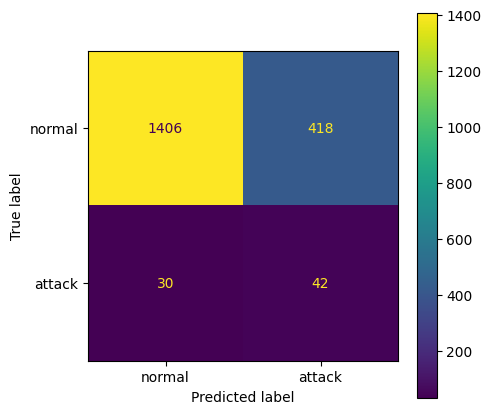

In [21]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 99.88129781060407  Test Accuracy DecisionTreeClassifier 99.0506329113924
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 90.9090909090909
Training Recall DecisionTreeClassifier 96.75090252707581  Test Recall DecisionTreeClassifier 83.33333333333334


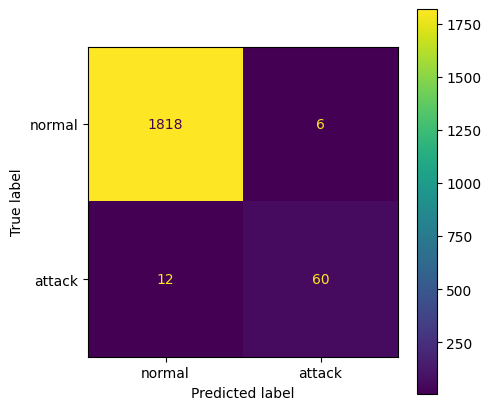

In [22]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
model = evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

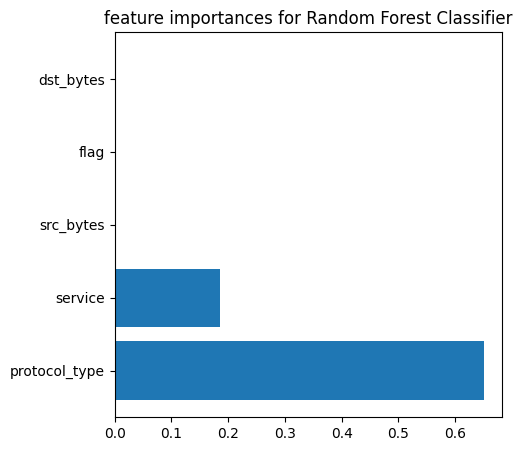

In [23]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(5,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Random Forest Classifier')
    plt.show()

features_names = training_dataset.drop(['class'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names)

[Text(0.5, 0.875, 'x[0] <= 6.5\ngini = 0.07\nsamples = 7582\nvalue = [7305, 277]'),
 Text(0.25, 0.625, 'x[1] <= 130.0\ngini = 0.288\nsamples = 224\nvalue = [39, 185]'),
 Text(0.125, 0.375, 'x[78] <= 0.5\ngini = 0.169\nsamples = 193\nvalue = [18, 175]'),
 Text(0.0625, 0.125, 'gini = 0.154\nsamples = 191\nvalue = [16, 175]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.375, 'x[1] <= 5140478.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.3125, 0.125, 'gini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.625, 'x[23] <= 0.5\ngini = 0.025\nsamples = 7358\nvalue = [7266, 92]'),
 Text(0.625, 0.375, 'x[0] <= 18917.5\ngini = 0.013\nsamples = 7194\nvalue = [7146, 48]'),
 Text(0.5625, 0.125, 'gini = 0.009\nsamples = 7146\nvalue = [7114, 32]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 48\nvalue = [32, 16]'),
 Text(0.875, 0.375, 'x[1] <= 2519.5\ngini = 0.393\nsamples = 164\nv

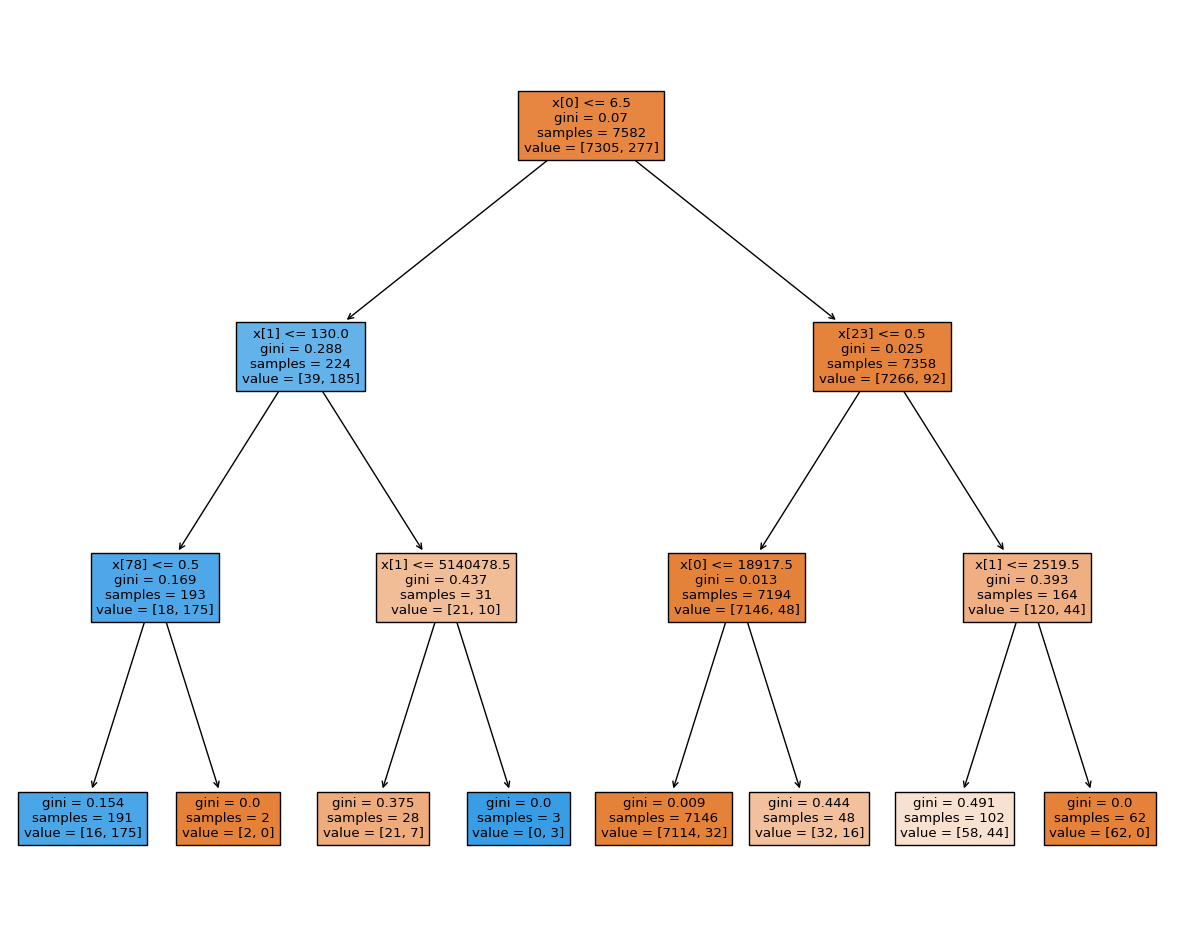

In [24]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

Training Accuracy RandomForestClassifier 99.88129781060407  Test Accuracy RandomForestClassifier 99.0506329113924
Training Precesion RandomForestClassifier 97.1830985915493  Test Precesion RandomForestClassifier 90.9090909090909
Training Recall RandomForestClassifier 99.63898916967509  Test Recall RandomForestClassifier 83.33333333333334


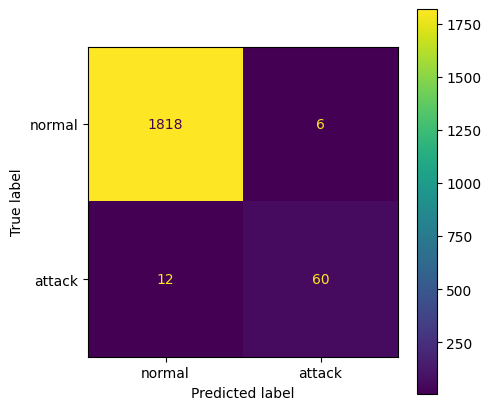

In [25]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

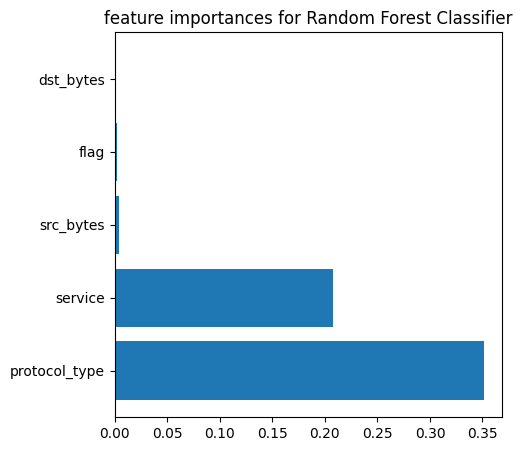

In [26]:
f_importances(abs(rf.feature_importances_), features_names)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [28]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5312      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [30]:
x_train = np.asarray(x_train).astype('int')
y_train = np.asarray(y_train)
x_test = np.asarray(x_test).astype('int')
y_test = np.asarray(y_test)

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, verbose=1)

Epoch 1/20
190/190 [==============================] - 4s 9ms/step - loss: 128937864.0000 - accuracy: 0.9068 - val_loss: 60960.6914 - val_accuracy: 0.9618
Epoch 2/20
190/190 [==============================] - 1s 8ms/step - loss: 88589304.0000 - accuracy: 0.8965 - val_loss: 41468.9023 - val_accuracy: 0.9585
Epoch 3/20
190/190 [==============================] - 2s 8ms/step - loss: 73352848.0000 - accuracy: 0.9204 - val_loss: 28832.5938 - val_accuracy: 0.9585
Epoch 4/20
190/190 [==============================] - 2s 9ms/step - loss: 60378036.0000 - accuracy: 0.9293 - val_loss: 20013.3008 - val_accuracy: 0.9624
Epoch 5/20
190/190 [==============================] - 1s 7ms/step - loss: 48436280.0000 - accuracy: 0.9426 - val_loss: 12824.6777 - val_accuracy: 0.9624
Epoch 6/20
190/190 [==============================] - 1s 7ms/step - loss: 43045056.0000 - accuracy: 0.9471 - val_loss: 8553.8945 - val_accuracy: 0.9585
Epoch 7/20
190/190 [==============================] - 1s 7ms/step - loss: 35687744

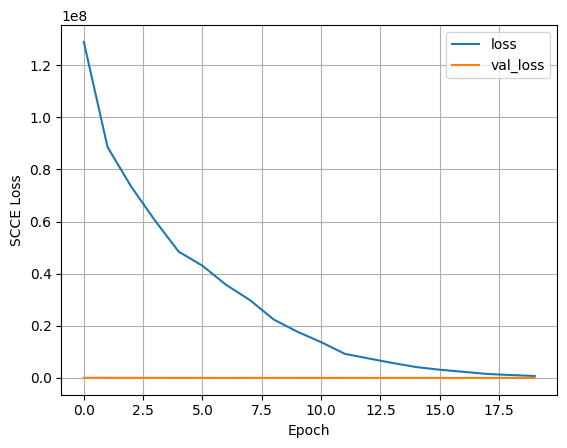

In [33]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

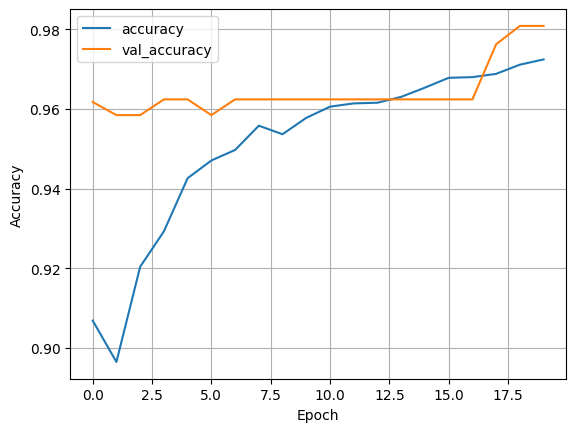

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [35]:
predictions = model.predict(x_test)
res = []
for each in predictions.tolist():
    res.append(round(each[0]))

accuracy = accuracy_score(y_test, res)

print(f"Testing Accuracy: {accuracy}")

60/60 [==============================] - 0s 1ms/step
Testing Accuracy: 0.9757383966244726


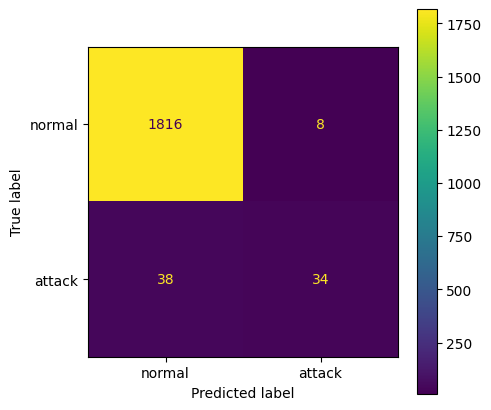

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, res)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cm_display.plot(ax=ax)

In [37]:
print("Comparing Accuracies\n")

keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]

for i in range(len(keys)):
    print(keys[i]+":")
    print("Training Accuracy:"+str(values[i][0]*100)+"%")
    print("Testing Accuracy:"+str(values[i][1]*100)+"%")
    print("\n")

Comparing Accuracies

Logistic Regression:
Training Accuracy:93.86705354787654%
Testing Accuracy:94.5675105485232%


KNeighborsClassifier:
Training Accuracy:98.76022157742021%
Testing Accuracy:98.4704641350211%


GaussianNB:
Training Accuracy:96.2410973357953%
Testing Accuracy:96.09704641350211%


Linear SVC:
Training Accuracy:75.11210762331838%
Testing Accuracy:76.37130801687763%


DecisionTreeClassifier:
Training Accuracy:99.88129781060407%
Testing Accuracy:99.0506329113924%


RandomForestClassifier:
Training Accuracy:99.88129781060407%
Testing Accuracy:99.0506329113924%




C:\Users\sreya\AppData\Local\Temp\ipykernel_11548\3701812322.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(keys)


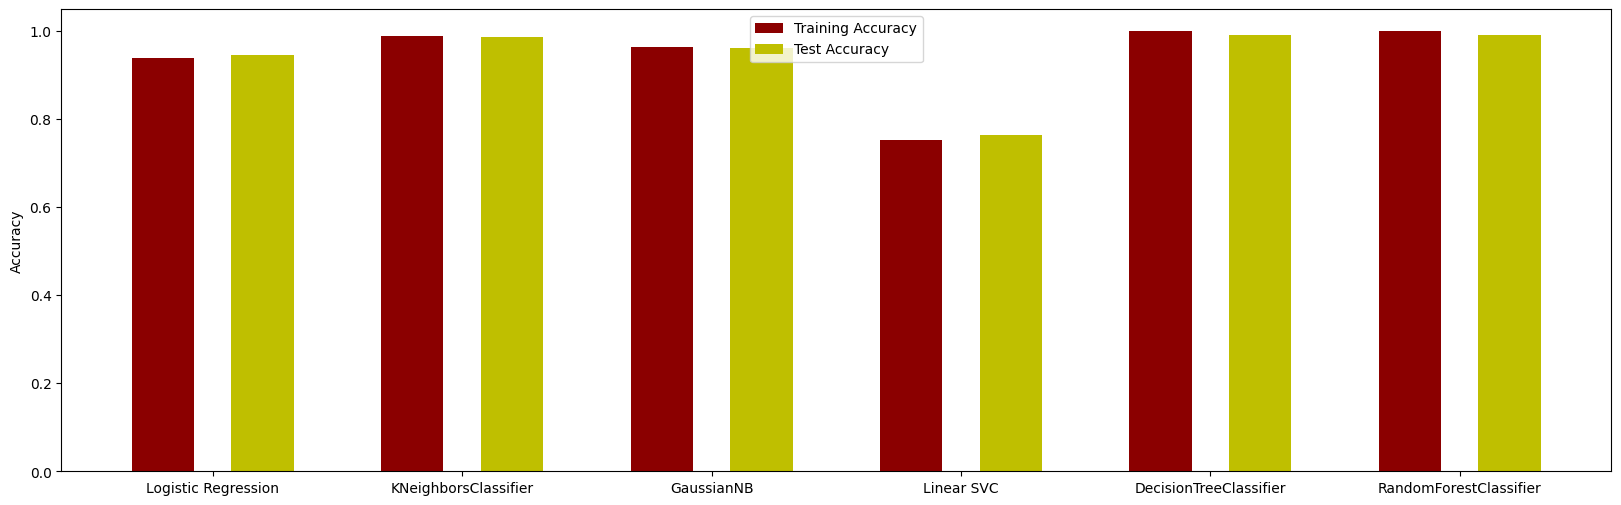

In [38]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

C:\Users\sreya\AppData\Local\Temp\ipykernel_11548\4117647720.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(keys)


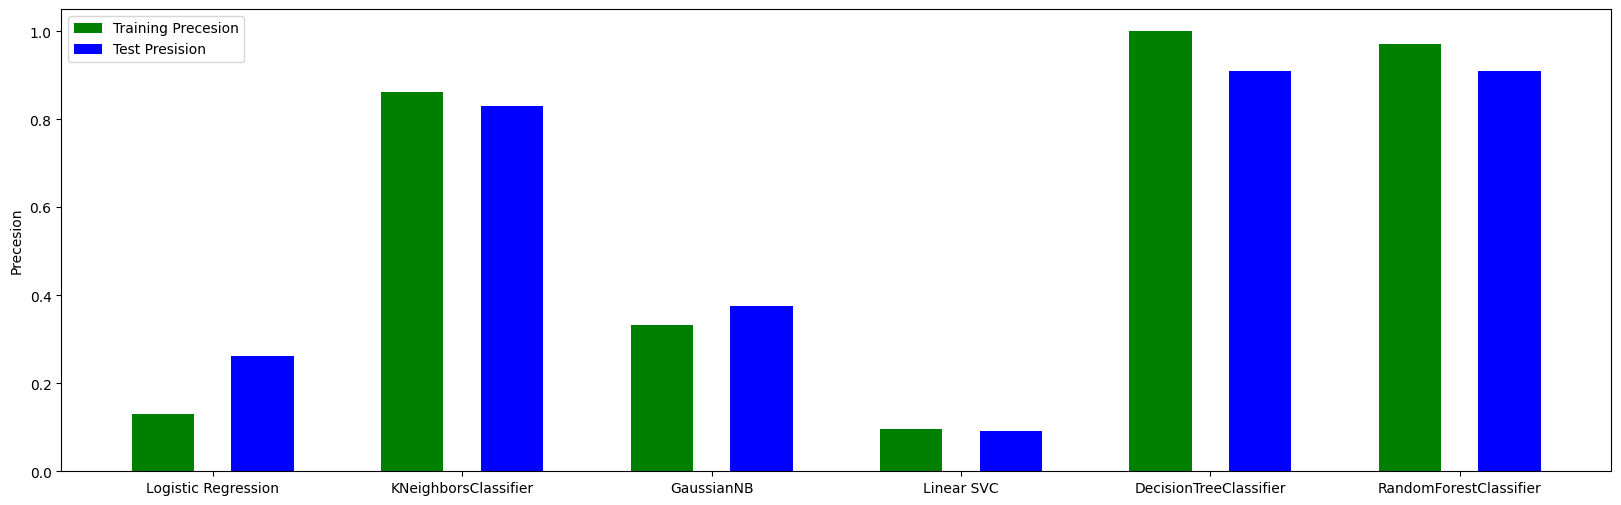

In [39]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

In [45]:
training_dataset.flag.unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)